# Universidad Politecnica Salesiana
### Nombre: Jessica Ñauta.
### Asigantura: Simulación.

## Metodo Cuadrado Medio

In [28]:
from collections import Counter
from collections import defaultdict
import random
import psutil
import numpy as np
import pandas as pd
import math
import collections
import matplotlib.pyplot as plt

In [29]:
valores =[74731897457]
arreglorn=[]
def get_pos(digs):
    val1 =0
    val2 =0
    if digs%2 !=0:
        val1 = int(digs/2)
        val2 = int(digs/2)+1
    else:
        val1 = int(digs/2)
        val2 = int(digs/2)
    return val1,val2

def calcular_num(iters, val, digs):
    x0_semilla = int(val)
    aum = get_pos(digs)
    print("ITERACIÓN", "Xn", "Xn*Xn", "Longitud","Ui","Rn")
    for i in range(iters):
        xn2= x0_semilla**2
        lon = len(str(xn2))
        ui = str(xn2)[int(lon/2)-aum[0]:int(lon/2)+aum[1]]
        rn = int(ui)/10**digs
        arreglorn.append(rn)
        #df=pd.DataFrame({"Xn":x0_semilla, "Xn*Xn":xn2 ,"Longitud":lon, "UI ":ui, "RN":rn})
        print(i, " ", x0_semilla," ",xn2, " ", lon, " ",ui, " ", rn)
        x0_semilla=int(ui)
    print("   ")
    
iters = int(input("Iteraciones: "))
digs = int(input("Ingrese el digito: "))
for i in valores:
    print("i: ", i)
    calcular_num(iters, i, digs)
    print("  ")

Iteraciones: 100
Ingrese el digito: 7
i:  74731897457
ITERACIÓN Xn Xn*Xn Longitud Ui Rn
0   74731897457   5584856497523563066849   22   9752356   0.9752356
1   9752356   95108447550736   14   8447550   0.844755
2   8447550   71361101002500   14   1101002   0.1101002
3   1101002   1212205404004   13   2205404   0.2205404
4   2205404   4863806803216   13   3806803   0.3806803
5   3806803   14491749080809   14   1749080   0.174908
6   1749080   3059280846400   13   9280846   0.9280846
7   9280846   86134102475716   14   4102475   0.4102475
8   4102475   16830301125625   14   0301125   0.0301125
9   301125   90676265625   11   6762656   0.6762656
10   6762656   45733516174336   14   3516174   0.3516174
11   3516174   12363479598276   14   3479598   0.3479598
12   3479598   12107602241604   14   7602241   0.7602241
13   7602241   57794068222081   14   4068222   0.4068222
14   4068222   16550430241284   14   0430241   0.0430241
15   430241   185107318081   12   1073180   0.107318
16   107318

In [24]:
n= int (math.sqrt(len(arreglorn)))
def clasificarNumeros(n,arregloRn):
    grupos = []
    inicio=0.00
    a=0
    b=1
    ranNumeros= {}

    for i in range(n+1):
        grupos.append(round(inicio,2))
        inicio=inicio+(1/n)

    for i in range(len(grupos)-1):
        valInferior=grupos[a]
        valSuperior=grupos[b]
        ranNumeros.update({str(valInferior)+","+str(valSuperior):[]})
        for i in arregloRn:
            if i==0.00:
                if i>=valInferior and i<= valSuperior:
                    ranNumeros[str(valInferior)+","+str(valSuperior)].append(i)
            else:
                if i>valInferior and i<= valSuperior:
                    ranNumeros[str(valInferior)+","+str(valSuperior)].append(i)
        a=b
        b=a+1
    return ranNumeros

In [26]:
def chi_cuadrado(n,arreglorn):
    ei = []
    oi = []
    to = []
    for i in list(n.keys()):
        ei.append(i)
        oi.append(n[i])
        to.append((len(n) - n[i]) ** 2 / len(n))
    d = {'Ei': ei, 'Oi': oi, "(Oi – Ei)²/Ei": to}
    df = pd.DataFrame(data=d)
    total = df['(Oi – Ei)²/Ei'].sum()
    validacion = total < arreglorn
    return df, total, validacion

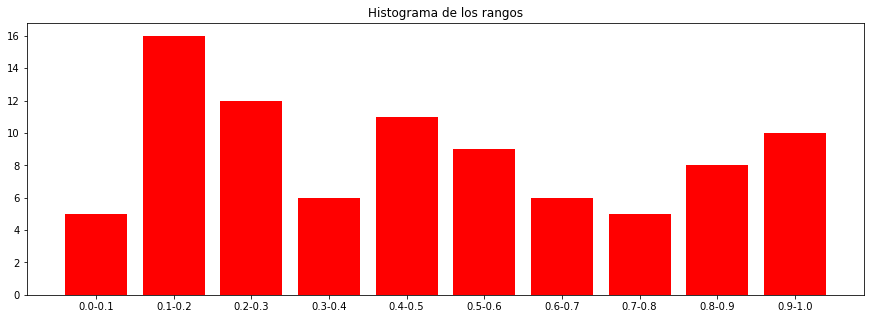

Total de (Oi – Ei)²/Ei 12.799999999999999
La distribución uniforme se acepta
Chi Cuadrado


,Ei,Oi,(Oi – Ei)²/Ei
0,0.0-0.1,5,2.5
1,0.1-0.2,16,3.6
2,0.2-0.3,12,0.4
3,0.3-0.4,6,1.6
4,0.4-0.5,11,0.1
5,0.5-0.6,9,0.1
6,0.6-0.7,6,1.6
7,0.7-0.8,5,2.5
8,0.8-0.9,8,0.4
9,0.9-1.0,10,0.0


In [32]:
def plot_histrograma(dic):
    plt.figure(figsize=(15, 5))
    keys = dic.keys()
    values = dic.values()
    plt.bar(keys, values, color="red")
    plt.title("Histograma de los rangos")
    plt.show()
    
semilla = 74731897457
cantidad = 100
digito = 7
valor = 16.9

lista = cuadrados_medios(cantidad, semilla, digito)
dic = cantidad_lista(lista)
plot_histrograma(dic)
    
df, total, val = chi_cuadrado(dic, valor)
sumaOi=sumaOi
if sumaOi<=16.9:
    print('La distribución uniforme se acepta')
else:
    print('La distribución uniforme no se acepta')

print("Chi Cuadrado")
df

## Metodo congruencia lineal

In [2]:
def m_congruencias_lineales(x, a, b, m):
 
    periodo = 0
    bandera = 0
    cont = 0
    xant = 0
    print("")
    print("Metodo Congruencias Lineales")
    print("  n  ", " Xo ", "     Un ", "  Xn+1")
    while(bandera != x):
        if (periodo == 0):
            bandera = x
        xant=x
        x = (a * x + b) % m
        print(" ", cont,"   ", xant,"  ", round(xant/m,4),"   ", x)
        periodo = periodo + 1
        cont=cont+1

def main():
    x = int(input("Introduce Xo: "))
    a = int(input("Introduce a: "))
    b = int(input("Introduce b: "))
    m = int(input("Introduce m: "))
    m_congruencias_lineales(x,a,b,m)

if __name__ == "__main__":
    main()

Introduce Xo: 7
Introduce a: 74731897457
Introduce b: 37747318974
Introduce m: 19

Metodo Congruencias Lineales
  n    Xo       Un    Xn+1
  0     7    0.3684     17
  1     17    0.8947     16
  2     16    0.8421     18
  3     18    0.9474     14
  4     14    0.7368     3
  5     3    0.1579     6
  6     6    0.3158     0
  7     0    0.0     12
  8     12    0.6316     7


In [3]:
def chi_cuadrado(n,arreglorn):
    ei = []
    oi = []
    to = []
    for i in list(n.keys()):
        ei.append(i)
        oi.append(n[i])
        to.append((len(n) - n[i]) ** 2 / len(n))
    d = {'Ei': ei, 'Oi': oi, "(Oi – Ei)²/Ei": to}
    df = pd.DataFrame(data=d)
    total = df['(Oi – Ei)²/Ei'].sum()
    validacion = total < arreglorn
    return df, total, validacion

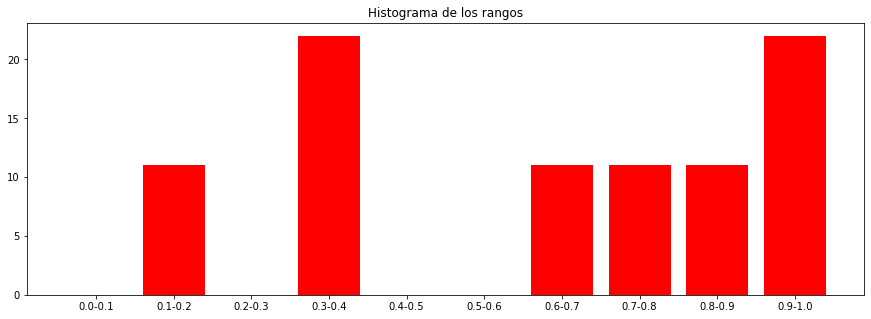

La distribución uniforme no se acepta
Chi Cuadrado


,Ei,Oi,(Oi – Ei)²/Ei
0,0.0-0.1,0,10.0
1,0.1-0.2,11,0.1
2,0.2-0.3,0,10.0
3,0.3-0.4,22,14.4
4,0.4-0.5,0,10.0
5,0.5-0.6,0,10.0
6,0.6-0.7,11,0.1
7,0.7-0.8,11,0.1
8,0.8-0.9,11,0.1
9,0.9-1.0,22,14.4


In [27]:
def plot_histrograma(dic):
    plt.figure(figsize=(15, 5))
    keys = dic.keys()
    values = dic.values()
    plt.bar(keys, values, color="red")
    plt.title("Histograma de los rangos")
    plt.show()
    
semilla = 74731897457
cantidad = 100
digito = 7
valor = 16.9
a=74731897457
c=37747318974
M=19

lista = congruencia(semilla, cantidad,a,c,M,digito)
dic = cantidad_lista(lista)
dic = cantidad_lista(lista)
plot_histrograma(dic)
df, total, val = chi_cuadrado(dic, valor)
sumaOi=sumaOi
if sumaOi<=16.9:
    print('La distribución uniforme se acepta')
else:
    print('La distribución uniforme no se acepta')

print("Chi Cuadrado")
df